<a href="https://colab.research.google.com/github/Hashim971/Image-Classification-Model/blob/main/Image_Classification_Model_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the MNIST dataset and split into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0  # Reshape and normalize training data for CNN
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0    # Reshape and normalize test data for CNN
y_train = to_categorical(y_train, num_classes=10)  # One-hot encode the labels
y_test = to_categorical(y_test, num_classes=10)    # One-hot encode the labels

# Create the neural network model with convolutional layers
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model with categorical cross-entropy loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data with validation set
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Plot the loss function and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

# Evaluate the model using the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
375/375 [==============================] - 32s 81ms/step - loss: 0.2786 - accuracy: 0.9190 - val_loss: 0.1107 - val_accuracy: 0.9693
Epoch 2/10
375/375 [==============================] - 29s 76ms/step - loss: 0.0902 - accuracy: 0.9744 - val_loss: 0.0746 - val_accuracy: 0.9775
Epoch 3/10
375/375 [==============================] - 31s 83ms/step - loss: 0.0565 - accuracy: 0.9837 - val_loss: 0.0630 - val_accuracy: 0.9809
Epoch 4/10
375/375 [==============================] - 27s 73ms/step - loss: 0.0409 - accuracy: 0.9882 - val_loss: 0.0647 - val_accuracy: 0.9808
Epoch 5/10
375/375 [==============================] - 28s 75ms/step - loss: 0.0319 - accuracy: 0.9904 - val_loss: 0.0530 - val_accuracy: 0.9851
Epoch 6/10
375/375 [==============================] - 27s 73ms/step - loss: 0.0238 - accuracy: 0.9931 - val_loss: 0.0562 - val_accuracy: 0.9837
Epoch 7/10
375/375 [==============================] - 28s 74ms/step - l

Loss VS Epoch

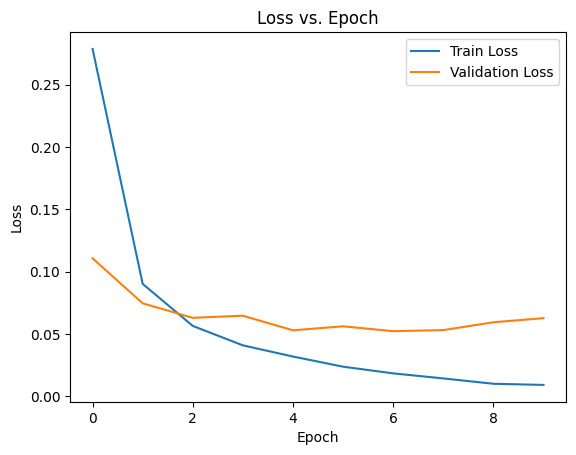

In [ ]:
import matplotlib.pyplot as plt
# Plot the loss function and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

Random images with True and Predicted labels

1/1 [==============================] - 0s 54ms/step


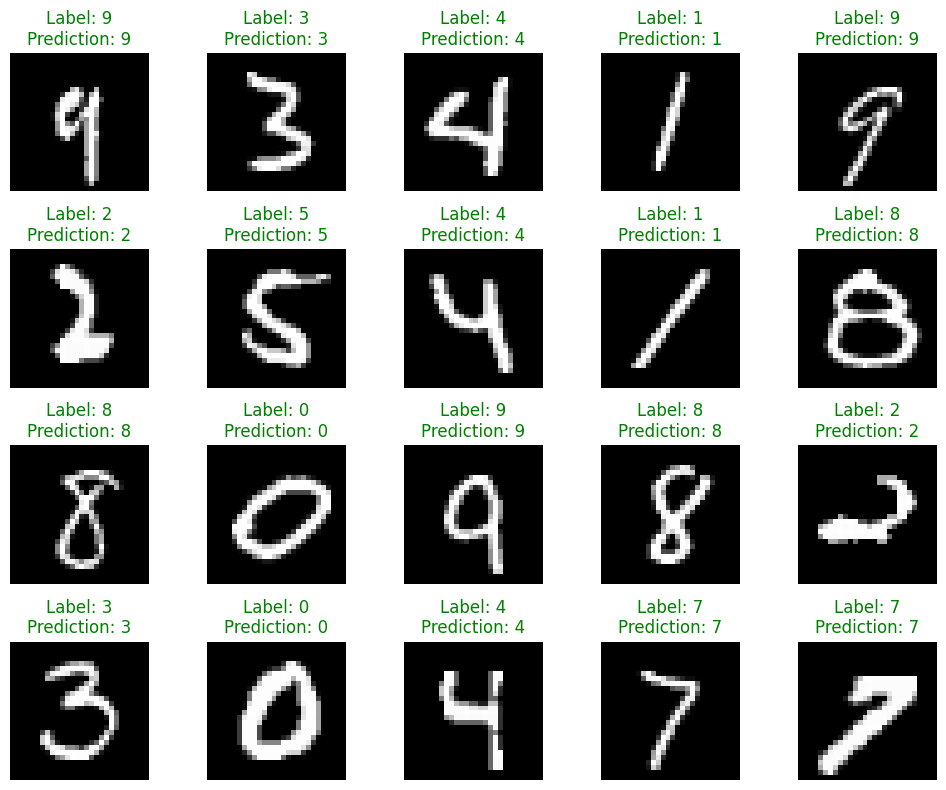

In [ ]:
import matplotlib.pyplot as plt
# Plot 20 random images with their labels and model predictions
plt.figure(figsize=(10, 8))
for i in range(20):
    index = np.random.randint(0, x_train.shape[0])
    image = x_train[index].reshape(28, 28)
    label = np.argmax(y_train[index])

    # Get the model's prediction for the image
    prediction = np.argmax(model.predict(x_train[index].reshape(1, 28, 28, 1)))

    color = 'green' if label == prediction else 'red'
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}\nPrediction: {prediction}', color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

Model Structure

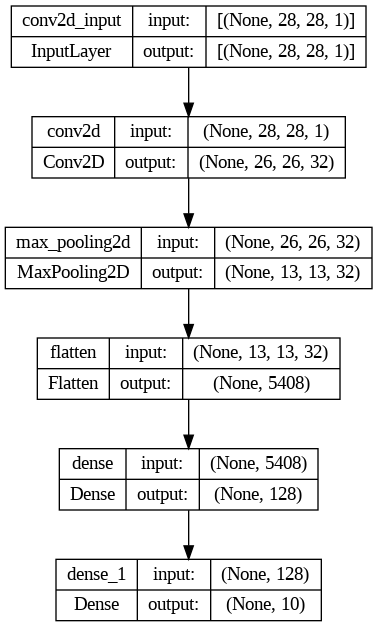

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot the model's structure
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

Confusion Matrix

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Get the predicted labels from the model's output probabilities
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Convert multilabel-indicator labels to multiclass labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=-1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the classification report
print(classification_report(y_test, y_pred))

313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.96      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



313/313 [==============================] - 5s 16ms/step


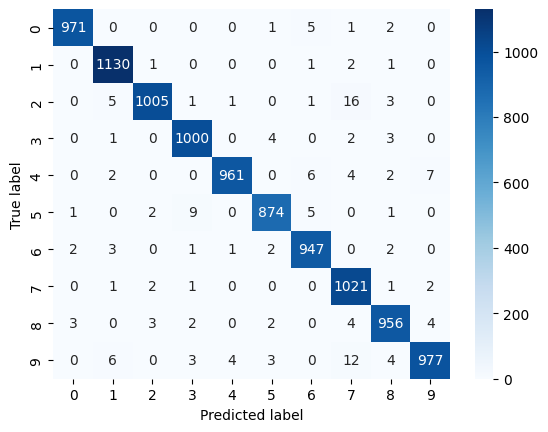

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the predicted labels from the model's output probabilities
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Convert multilabel-indicator labels to multiclass labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=-1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Set the plot labels
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
